In [1]:
import pandas as pd

from route_66.batch_run import plot_batch
from route_66.visualisation import plot_simulation, plot_queues

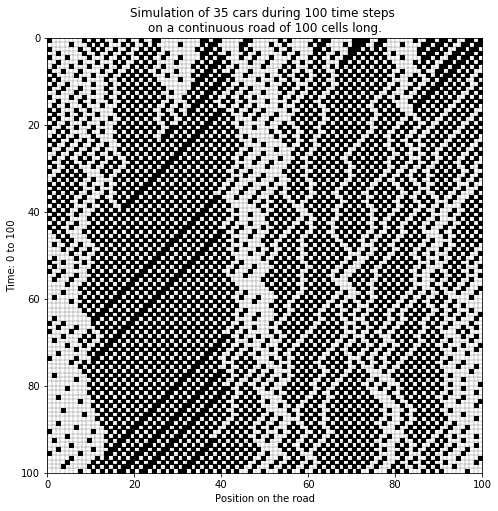

In [2]:
plot_simulation(100, 35, length=100, p=0.3, grid=True)

## Analysis
### Plot
Plot containing boxplots visualising the effects of timer length and initial number of cars on average velocity:

300it [00:15, 19.44it/s]


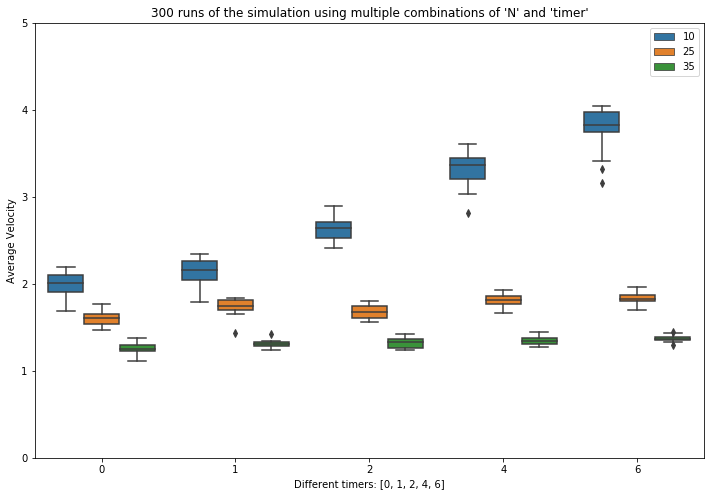

In [3]:
data = plot_batch(N=[10, 25, 35], timer=[0, 1, 2, 4, 6], iterations=20)

### Using Pandas


In [4]:
# Drop Run, length and lanes, and group Dataframe by initial cars on road 
N_data = data.drop(["Run", "length", "lanes"], axis=1).groupby("N")

# For each group, split from dataframe, group by timer, find mean for velocity and STD, sort by Average velocity
timer_data = [N_data.get_group(x).groupby("timer").mean().sort_values("Average Velocity", ascending=False) for x in N_data.groups]

In [5]:
mean_data = pd.concat(timer_data)
mean_data

,N,Average Velocity,On Ramp Queue,Standard Deviation,Waiting Queue
timer,,,,,
6,10.0,3.787626,0.00,1.339480,87.0
4,10.0,3.312933,0.00,1.576908,81.0
2,10.0,2.618483,0.00,1.734468,68.0
1,10.0,2.152882,10.10,1.647566,51.0
0,10.0,1.987906,57.60,1.602629,1.0
6,25.0,1.833710,2.15,1.235468,87.0
4,25.0,1.809015,6.75,1.282747,81.0
1,25.0,1.736585,35.60,1.325376,51.0
2,25.0,1.679434,16.30,1.178941,68.0


For each variation of N, the timer with a length of 6 grants the greatest average average velocity. It usually also grants a lower or the lowest average standard deviation for its N.   

The greater the amount of initial cars, the lesser the impact of timer length. 

300it [00:14, 20.57it/s]


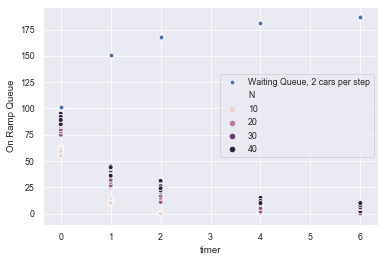

In [2]:
plot_queues()